In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

# set seaborn charts for better view
sns.set(style='ticks')

In [2]:
# Importing the data files

# Customers data
customers=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/CUSTOMERS.csv')

# Sellers data
sellers= pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/SELLERS.csv')

# Product data
products=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/PRODUCTS.csv')

# Order details data
orders=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDERS.csv')

# Order_items data (order level info)
order_items=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_ITEMS.csv')

# Order_payments info
order_payment=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_PAYMENTS.csv')

# Order_Review_Ratings data
order_review_rating=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_REVIEW_RATINGS.csv')

# geolocation data
geo_location=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/GEO_LOCATION.csv')

# Performing Data cleaning for customers data

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [4]:
# checking for null values
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

There are no null values in the customers data

In [5]:
# checking for duplicate values
customers.duplicated().sum()

0

There are no duplicate values in the customers info

In [6]:
# checking for data types in customers data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


There is no need for data clean up for customers info data

# Performing Data cleaning for sellers data

In [7]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [8]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [9]:
# checking for null values
sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [10]:
# dropping the rows containing null values
sellers.dropna(axis=0, inplace=True)

In [11]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [12]:
# check for duplicate values
sellers.duplicated().sum()

0

# Performing data cleaning for products data

In [13]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
# checking for null values 
products.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [16]:
# droppping the rows containing null values
products.dropna(axis=0, inplace=True)

In [17]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [18]:
# checking for duplicates
products.duplicated().sum()

0

# Data cleaning for orders data

In [19]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
# It seems there are null values in the dataset
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
# dropping the null values
orders.dropna(axis=0, inplace=True)
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [23]:
# checking for duplicate values
orders.duplicated().sum()

0

In [24]:
# changing date columns to datetime format
orders.order_purchase_timestamp = pd.to_datetime( orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime( orders.order_approved_at)
orders.order_delivered_carrier_date=pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date= pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

# data cleaning for order item dataset

In [25]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [26]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [27]:
# Since there are no null values, checking for duplicate values
order_items.duplicated().sum()

0

In [28]:
# changing the shipping date column to datetime format
order_items.shipping_limit_date=pd.to_datetime(order_items.shipping_limit_date)

# data cleaning for order payment dataset

In [29]:
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [30]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [32]:
order_payment.duplicated().sum()

0

# data cleaning for order review dataset

In [33]:
order_review_rating.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [34]:
order_review_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [35]:
order_review_rating.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [36]:
order_review_rating.duplicated().sum()

0

In [37]:
# changing the review create date and review answer column to datetime format

order_review_rating.review_creation_date = pd.to_datetime(order_review_rating.review_creation_date)

order_review_rating.review_answer_timestamp = pd.to_datetime(order_review_rating.review_answer_timestamp)

# Data cleaning for geo-location dataset

In [38]:
geo_location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [39]:
geo_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [40]:
# there are no null values, checking for duplicte values
geo_location.duplicated().sum()

0

There is no need fr data cleaning in geo location dataset

# Performing detailed exploratory data analysis

# 1. (a): Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [41]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14


In [42]:
# renaming the order_item_id column to order quanity for us to be able to calculate total cost per item
order_items.rename(columns={'order_item_id':'order_qty'}, inplace=True)

In [43]:
# now calculating total cost per item
order_items['total_cost']=(order_items.order_qty* order_items.price)+ order_items.freight_value

In [44]:
order_items.head()

,order_id,order_qty,product_id,seller_id,shipping_limit_date,price,freight_value,total_cost
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04


In [45]:
# Total revenue
print('Total revenue: ', round(order_items.total_cost.sum(),2))

Total revenue:  17649648.15


In [46]:
# Total Quantity

print('Total Quanity: ', order_items.order_qty.sum())

Total Quanity:  134936


In [47]:
#Total Products
print('Total Products:',order_items.product_id.nunique())

Total Products: 32951


In [48]:
# Total categories
print('Total categories: ', products.product_category_name.nunique())

Total categories:  71


In [49]:
# Total sellers
print('Total sellers: ', sellers.seller_id.nunique())

Total sellers:  3038


In [50]:
# Total locations
print('Total locations: ',geo_location.geolocation_zip_code_prefix.nunique())

Total locations:  19015


In [51]:
# total channels

print('total channels: ', order_payment.payment_type.nunique())

total channels:  5


In [52]:
# Total Payment methods
print('Total Payment methods: ', order_payment.payment_type.nunique())

Total Payment methods:  5


# 1. (b): Understanding how many new customers acquired every month?

In [53]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26


In [54]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [55]:
# Extracting monthly data from order purchase timestamp column
orders['year_month']=orders.order_purchase_timestamp.dt.strftime('%Y-%m')

In [56]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02


In [57]:
# merging orders and customers table using customer id column as matching column

new_cust=pd.merge(right=customers, left=orders,how='inner', on='customer_id')
new_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh


In [58]:
unique_customers=new_cust.groupby('year_month').customer_unique_id.count().reset_index()

In [59]:
unique_customers.drop_duplicates(inplace=True, keep='first')

In [60]:
unique_customers.head()

,year_month,customer_unique_id
0,2016-09,1
1,2016-10,270
2,2016-12,1
3,2017-01,748
4,2017-02,1641


In [61]:
unique_customers.rename(columns={'customer_unique_id': 'Count'}, inplace=True)

<Axes: xlabel='Count', ylabel='year_month'>

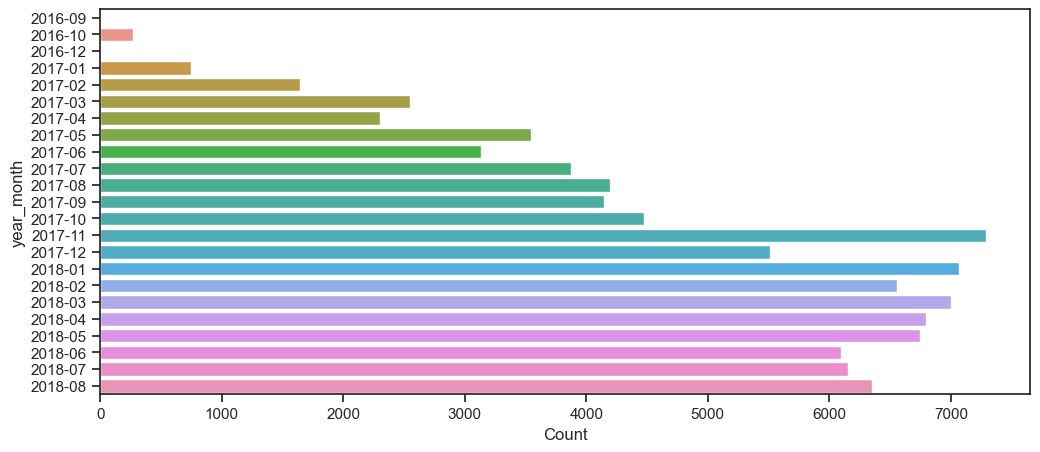

In [62]:
plt.figure(figsize=(12,5))
sns.barplot(y="year_month", x="Count", data=unique_customers, orient="h")

# 1. (c): Understand the retention of customers on month on month basis


In [63]:
unique_customers_new=new_cust[['year_month', 'customer_unique_id']]

In [64]:
unique_customers_2=unique_customers_new.drop_duplicates()

In [65]:
print(unique_customers_new.shape[0])
print(unique_customers_2.shape[0])

96461
95177


In [66]:
customer_retention=unique_customers_2[~unique_customers_2.isin(unique_customers_new.all(axis=1))]

In [67]:
customer_retention.head()

,year_month,customer_unique_id
0,2017-10,7c396fd4830fd04220f754e42b4e5bff
1,2018-07,af07308b275d755c9edb36a90c618231
2,2018-08,3a653a41f6f9fc3d2a113cf8398680e8
3,2017-11,7c142cf63193a1473d2e66489a9ae977
4,2018-02,72632f0f9dd73dfee390c9b22eb56dd6


In [68]:
retention_id_count=customer_retention.groupby('year_month').customer_unique_id.count()

Text(0.5, 0, 'Count')

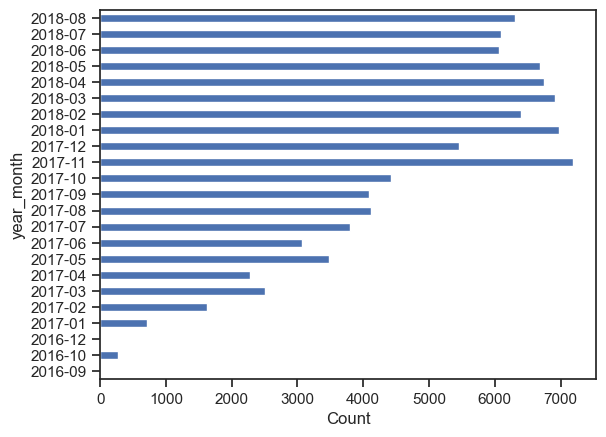

In [69]:
retention_id_count.plot(kind='barh')
plt.xlabel('Count')

# 1. (d): How the revenues from existing/new customers on month on month basis

In [70]:
order_merge= pd.merge(left=orders, right=order_items, how='left', on='order_id')
order_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,order_qty,product_id,seller_id,shipping_limit_date,price,freight_value,total_cost
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:00,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:00,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:00,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:00,19.90,8.72,28.62


In [71]:
# generating net cost per entry
order_merge['net_cost']=order_merge.price + order_merge.freight_value

In [72]:
monthy_cost=order_merge.groupby('year_month').net_cost.sum()

Text(0.5, 0, 'net cost')

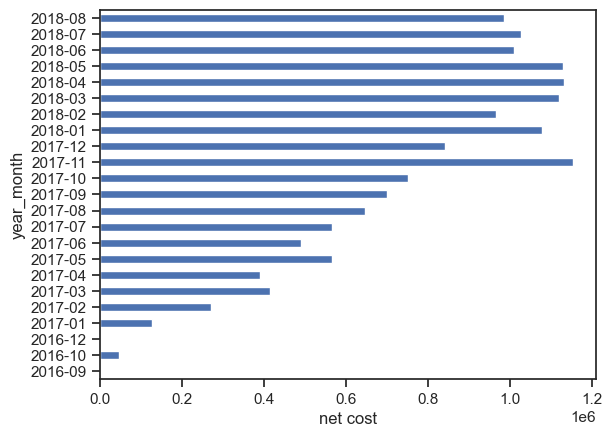

In [73]:
monthy_cost.plot(kind='barh')
plt.xlabel('net cost')

# 1. (e): Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [74]:
# merging order_merge dataset to products dataset to access sales with category
product_sale = pd.merge(left=order_merge, right=products, how='left', on='product_id')
product_sale.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,order_qty,...,total_cost,net_cost,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,1,...,38.71,38.71,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,1,...,141.46,141.46,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,1,...,179.12,179.12,Auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,1,...,72.20,72.20,Pet_Shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,1,...,28.62,28.62,Stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [75]:
product_sales_cat=product_sale.groupby('product_category_name')[['order_qty', 'total_cost']].sum().reset_index()

In [76]:
# product category wise sales with quantity
product_sales_cat.head()

,product_category_name,order_qty,total_cost
0,Agro_Industry_And_Commerce,258,94878.59
1,Air_Conditioning,353,72571.38
2,Art,203,28095.48
3,Arts_And_Craftmanship,26,2246.03
4,Audio,381,57534.63


In [77]:
# merge customer data with order_merge
cust_loc= pd.merge(left=order_merge, right=customers, how='left', on='customer_id')


loc_sales=cust_loc.groupby('customer_zip_code_prefix')[['order_qty','total_cost']].sum().reset_index()

In [78]:
# location wise sales trend
loc_sales

,customer_zip_code_prefix,order_qty,total_cost
0,1003,1,98.97
1,1004,2,198.11
2,1005,6,570.72
3,1006,2,868.05
4,1007,4,505.55
...,...,...,...
14884,99955,3,191.91
14885,99960,1,141.63
14886,99965,2,227.59
14887,99970,1,252.74


In [79]:
product_sale.year_month=pd.to_datetime(product_sale.year_month)

In [80]:
product_sale['Month']=product_sale.year_month.apply(lambda x:pd.Timestamp.strftime(x, format = '%b'))

In [81]:
# monthly sales trend

product_sale.groupby('Month')[['order_qty', 'total_cost']].sum().reset_index()

,Month,order_qty,total_cost
0,Apr,12479,1683042.77
1,Aug,14143,1804714.33
2,Dec,7215,913307.50
3,Feb,11343,1383423.56
4,Jan,10820,1347366.55
5,Jul,13586,1762741.45
6,Jun,12392,1648959.56
7,Mar,13023,1694678.21
8,May,14105,1888752.05
9,Nov,10383,1315399.65


In [82]:
# sales by week
product_sale['week_no'] = product_sale.year_month.dt.isocalendar().week

In [83]:
weekly_sales = product_sale.groupby('week_no')[['order_qty','total_cost']].sum().reset_index()
weekly_sales

,week_no,order_qty,total_cost
0,1,9549,1198825.48
1,5,11343,1383423.56
2,9,13023,1694678.21
3,13,12479,1683042.77
4,18,14105,1888752.05
5,22,12392,1648959.56
6,26,13586,1762741.45
7,31,14143,1804714.33
8,35,5652,830551.61
9,39,6878,904497.69


In [84]:
# trend/seasonality of sales, quantity with day
product_sale['day_no'] = product_sale['order_purchase_timestamp'].dt.day

In [85]:
product_sale.groupby(['day_no'])[['order_qty','total_cost']].sum().reset_index()

,day_no,order_qty,total_cost
0,1,4045,572771.31
1,2,4185,560410.32
2,3,4143,564802.78
3,4,4337,594329.56
4,5,4683,607517.84
5,6,4524,600892.46
6,7,4325,589303.30
7,8,4384,554148.75
8,9,4299,576496.19
9,10,4069,551938.43


In [86]:
# trends/seasonality by time
product_sale['time']=product_sale['order_purchase_timestamp'].dt.time

In [87]:
product_sale.groupby('time')[['order_qty','total_cost']].sum().reset_index()

,time,order_qty,total_cost
0,00:00:00,55,7699.33
1,00:01:00,66,7551.84
2,00:02:00,48,5348.85
3,00:03:00,63,10169.12
4,00:04:00,79,10214.77
...,...,...,...
1428,23:55:00,67,9820.85
1429,23:56:00,84,9521.43
1430,23:57:00,52,8748.16
1431,23:58:00,53,8158.36


In [88]:
# merging product_sale with order_payment

prod_sale_pay= pd.merge(product_sale, order_payment, how='left', on='order_id')


In [89]:
# trend/ seasonality by channel
prod_sale_pay.groupby('payment_type')[['total_cost']].sum().reset_index()

,payment_type,total_cost
0,UPI,3236634.68
1,credit_card,13661419.77
2,debit_card,223893.41
3,voucher,811611.83


In [90]:
# trend/seasonality of sales, quantity by payment method (payment method visa for credit card/debit card)
prod_sale_pay['payment_method']= np.where(prod_sale_pay.payment_type=='UPI', 'UPI', np.where(prod_sale_pay.payment_type=='voucher','Voucher','VISA'))

In [91]:
prod_sale_pay.groupby('payment_method')[['order_qty','total_cost']].sum().reset_index()

,payment_method,order_qty,total_cost
0,UPI,27968,3236634.68
1,VISA,102694,13885591.61
2,Voucher,6952,811611.83


# 1. (f): Popular products by month, seller, state & category.

In [92]:
# most popular products by month
product_sale.groupby(['product_id','Month']).order_qty.sum().reset_index().sort_values(by = 'order_qty', ascending=False)

,product_id,Month,order_qty
55269,ee3d532c8a438679776d222e997606b3,Feb,215
34545,9571759451b1d780ee7c15012ea109d4,Aug,210
15453,422879e10f46682990de24d770e7f83d,Dec,161
9253,270516a3f41dc035aa87d220228f844c,Jul,145
13193,389d119b48cf3043d311335e499d9c6b,Nov,137
...,...,...,...
23806,65d1e9d7432a5bdb5456b22f91747ab3,May,1
23807,65d5bf9ec18c2fd1bd7c9ff9b935a320,May,1
23808,65d7a1724c5c7fd77ac36c80f241ba6a,Nov,1
23809,65dcea9092da1362310088f4a84db93e,Jun,1


In [93]:
# trend of popular products by sellers
product_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   year_month                     110180 non-null  datetime64[ns]
 9   order_qty                      110180 non-null  int64         
 10  product_id                     110180 non-null  object        
 11  

In [94]:
prod_seller_trend=product_sale.groupby(['product_id','seller_id']).order_qty.sum().reset_index().sort_values(by='order_qty', ascending=False)

In [95]:
prod_seller_trend

,product_id,seller_id,order_qty
8786,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,793
22584,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,632
7219,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,551
11070,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,545
7516,389d119b48cf3043d311335e499d9c6b,1f50f920176fa81dab994f9023523100,532
...,...,...,...
14558,6e38838cab9f851eb58af53b57caf709,157c3e4b42f81ac4a44e8b1ca2fe9876,1
14557,6e38442006e8540f8ffc733c8a243d70,fdb9095204a334cd8872252ffec6f2db,1
14556,6e3186505d9f4c946921bd51a5b79742,0b90b6df587eb83608a64ea8b390cf07,1
14554,6e2e6746f4200ebbb71dfaa3c6ba31dc,f00e21b1e91a79653163b7fd8f293ff1,1


In [96]:
# trend of most popular product by state
cust_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   year_month                     110180 non-null  object        
 9   order_qty                      110180 non-null  int64         
 10  product_id                     110180 non-null  object        
 11  

In [97]:
# Merging products dataset to cust_loc dataset to include product category names
prod_state = pd.merge(left=cust_loc, right=products, how='left', on='product_id')
prod_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   year_month                     110180 non-null  object        
 9   order_qty                      110180 non-null  int64         
 10  product_id                     110180 non-null  object        
 11  

In [98]:
prod_state_trend= prod_state.groupby(['product_id','customer_state']).order_qty.sum().reset_index().sort_values(by='order_qty', ascending=False)

In [99]:
prod_state_trend

,product_id,customer_state,order_qty
14054,422879e10f46682990de24d770e7f83d,Andhra Pradesh,470
36317,aca2eb7d00ea1a7b8ebd4e68314663af,Andhra Pradesh,422
32337,99a4788cb24856965c36a24e339b6058,Andhra Pradesh,318
11973,389d119b48cf3043d311335e499d9c6b,Andhra Pradesh,301
11486,368c6c730842d78016ad823897a372db,Andhra Pradesh,298
...,...,...,...
21560,65785506a1566ea8655e9e1665754947,Madhya Pradesh,1
21562,657ddf22d1f54eb6f9e094190749a85e,Gujarat,1
21563,65803a899ace1acd56cbb80caeabc936,Andhra Pradesh,1
21566,65841ad29fc48cd40902e03da7511e05,Arunachal Pradesh,1


In [100]:
# trend of popular products by category
prod_cat_trend = product_sale.groupby(['product_category_name','product_id']).order_qty.sum().reset_index().sort_values(by='order_qty', ascending=False)

In [101]:
prod_cat_trend

,product_category_name,product_id,order_qty
15023,Garden_Tools,422879e10f46682990de24d770e7f83d,793
13825,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,632
14981,Garden_Tools,368c6c730842d78016ad823897a372db,551
15082,Garden_Tools,53759a2ecddad2bb87a079a1f1519f73,545
14992,Garden_Tools,389d119b48cf3043d311335e499d9c6b,532
...,...,...,...
13799,Furniture_Decor,aaa8957f9861aff94f589c3a0e1106cd,1
13798,Furniture_Decor,aa7fd7ef22424867db4621a2ab54e59c,1
13796,Furniture_Decor,aa07dadb101ca2d652eaaec5c33c37af,1
13794,Furniture_Decor,a9fa5ce6ccf634df53e924a8ca7099ab,1


# 1. (g): Popular categories by state, month

In [102]:
# popular categories by state
cat_state_trend= prod_state.groupby(['product_category_name','customer_state']).order_qty.sum().reset_index().sort_values(by='order_qty', ascending=False)

In [103]:
cat_state_trend.head()

,product_category_name,customer_state,order_qty
107,Bed_Bath_Table,Andhra Pradesh,8680
566,Furniture_Decor,Andhra Pradesh,7045
629,Health_Beauty,Andhra Pradesh,6914
218,Computers_Accessories,Andhra Pradesh,6139
965,Sports_Leisure,Andhra Pradesh,5975


In [104]:
# popular categories by month
cat_month_trend=product_sale.groupby(['product_id','Month']).order_qty.sum().reset_index().sort_values(by = 'order_qty', ascending=False)

cat_month_trend

,product_id,Month,order_qty
55269,ee3d532c8a438679776d222e997606b3,Feb,215
34545,9571759451b1d780ee7c15012ea109d4,Aug,210
15453,422879e10f46682990de24d770e7f83d,Dec,161
9253,270516a3f41dc035aa87d220228f844c,Jul,145
13193,389d119b48cf3043d311335e499d9c6b,Nov,137
...,...,...,...
23806,65d1e9d7432a5bdb5456b22f91747ab3,May,1
23807,65d5bf9ec18c2fd1bd7c9ff9b935a320,May,1
23808,65d7a1724c5c7fd77ac36c80f241ba6a,Nov,1
23809,65dcea9092da1362310088f4a84db93e,Jun,1


# 1. (h): Top 10 most expensive products sorted by price

In [105]:
product_sale.groupby('product_id').price.mean().reset_index().sort_values(by='price', ascending=False)

,product_id,price
9224,489ae2aa008f021502940f251d4cce7f,6735.00
13378,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
3620,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
20830,a6492cc69376c469ab6f61d8f44de961,4799.00
24634,c3ed642d592594bb648ff4a04cee2747,4690.00
...,...,...
6248,310dc32058903b6416c71faff132df9e,2.29
9033,46fce52cef5caa7cc225a5531c946c8b,2.20
5047,270516a3f41dc035aa87d220228f844c,1.20
684,05b515fdc76e888aada3c6d66c201dff,1.20


# 2. Performing customer/seller segmentation

# a. Divide customers into groups based on revenue generated

In [106]:
cust_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   year_month                     110180 non-null  object        
 9   order_qty                      110180 non-null  int64         
 10  product_id                     110180 non-null  object        
 11  

In [107]:
cust_group= cust_loc.groupby('customer_id').total_cost.mean().reset_index().sort_values(by='total_cost')

In [108]:
# creating group of customers based on revenue generated

cust_group['customer revenue group']= pd.cut(cust_group.total_cost, bins=10, labels=np.arange(1,11))

cust_group.head()

,customer_id,total_cost,customer revenue group
63166,a790343ca6f3fee08112d678b43aa7c5,9.59,1
9176,184e8e8e48937145eb96c721ef1f0747,10.07,1
53526,8e4bd65db637116b6b68109e4df21b84,10.89,1
1690,046f890135acc703faff4c1fc0c2d73c,11.56,1
79693,d2c63ad286e3ca9dd69218008d61ff81,11.62,1


In [109]:
# grouping of sellers based on revenue generated

seller_grp = cust_loc.groupby('seller_id').total_cost.mean().reset_index().sort_values(by='total_cost')

# creating bins for grouping

seller_grp['seller revenue group']= pd.cut(seller_grp.total_cost, bins=10, labels=np.arange(1,11))

seller_grp.head()

,seller_id,total_cost,seller revenue group
1414,77128dec4bec4878c37ab7d6169d6f26,15.22,1
846,4965a7002cca77301c82d3f91b82e1a9,16.36,1
1319,702835e4b785b67a084280efca355756,18.56,1
2007,ad14615bdd492b01b0d97922e87cb87f,19.21,1
676,3ac588cd562971392504a9e17130c40b,19.29,1


# 3. Cross-selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (comnination of 2 or 3 buying together)

In [110]:
# Cross Selling of products on the basis of same order id and same order purchase timestamp
cross_sell = order_merge.loc[: , ['order_id','order_purchase_timestamp','product_id']]
cross_sell = cross_sell[cross_sell.duplicated(subset = ['order_id','order_purchase_timestamp'], keep = False)]
cross_sell

,order_id,order_purchase_timestamp,product_id
9,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-16 19:41:00,08574b074924071f4e201e151b152b4e
10,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-16 19:41:00,08574b074924071f4e201e151b152b4e
26,acce194856392f074dbf9dada14d8d82,2018-06-04 00:00:00,d70f38e7f79c630f8ea00c993897042c
27,acce194856392f074dbf9dada14d8d82,2018-06-04 00:00:00,9451e630d725c4bb7a5a206b48b99486
52,9faeb9b2746b9d7526aef5acb08e2aa0,2018-07-26 14:39:00,f48eb5c2fde13ca63664f0bb05f55346
...,...,...,...
110152,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,0df37da38a30a713453b03053d60d3f7
110170,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:00,c982dbea53b864f4d27c1d36f14b6053
110171,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:00,49d2e2460386273b195e7e59b43587c3
110177,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:00,d1c427060a0f73f6b889a5c7c61f2ac4


In [111]:
# First set of cross selling data
cross_sell_1 = cross_sell.drop_duplicates(subset=['order_id','order_purchase_timestamp'], keep='first', ignore_index=True)
cross_sell_1

,order_id,order_purchase_timestamp,product_id
0,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-16 19:41:00,08574b074924071f4e201e151b152b4e
1,acce194856392f074dbf9dada14d8d82,2018-06-04 00:00:00,d70f38e7f79c630f8ea00c993897042c
2,9faeb9b2746b9d7526aef5acb08e2aa0,2018-07-26 14:39:00,f48eb5c2fde13ca63664f0bb05f55346
3,66e4624ae69e7dc89bd50222b59f581f,2018-03-09 14:50:00,b37b72d5a56f887725c2862184b8cab8
4,688052146432ef8253587b930b01a06d,2018-04-22 08:48:00,d1c427060a0f73f6b889a5c7c61f2ac4
...,...,...,...
9630,83db27f85506380229913b0dfdf5cd18,2018-04-18 12:35:00,86f2416d4670e4ea3ca5494d043d9f24
9631,b3112ca67f3afd4e20cf2ee91fc4f804,2018-08-02 22:46:00,4f18ca9862f511ecba98258b2194d061
9632,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,0df37da38a30a713453b03053d60d3f7
9633,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:00,c982dbea53b864f4d27c1d36f14b6053


In [112]:
# Second set of cross selling data
cross_sell_2 = cross_sell.drop_duplicates(subset=['order_id','order_purchase_timestamp'], keep='last', ignore_index=True)
cross_sell_2

,order_id,order_purchase_timestamp,product_id
0,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-16 19:41:00,08574b074924071f4e201e151b152b4e
1,acce194856392f074dbf9dada14d8d82,2018-06-04 00:00:00,9451e630d725c4bb7a5a206b48b99486
2,9faeb9b2746b9d7526aef5acb08e2aa0,2018-07-26 14:39:00,f48eb5c2fde13ca63664f0bb05f55346
3,66e4624ae69e7dc89bd50222b59f581f,2018-03-09 14:50:00,b37b72d5a56f887725c2862184b8cab8
4,688052146432ef8253587b930b01a06d,2018-04-22 08:48:00,db56f6d2b04c89eae4daba188842fd7b
...,...,...,...
9630,83db27f85506380229913b0dfdf5cd18,2018-04-18 12:35:00,86f2416d4670e4ea3ca5494d043d9f24
9631,b3112ca67f3afd4e20cf2ee91fc4f804,2018-08-02 22:46:00,4f18ca9862f511ecba98258b2194d061
9632,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,0df37da38a30a713453b03053d60d3f7
9633,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:00,49d2e2460386273b195e7e59b43587c3


In [113]:
# Cross selling of 2 products together
cross_sell_final = pd.merge(cross_sell_1, cross_sell_2, on = ['order_id','order_purchase_timestamp'], how = 'inner')
cross_sell_final

,order_id,order_purchase_timestamp,product_id_x,product_id_y
0,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-16 19:41:00,08574b074924071f4e201e151b152b4e,08574b074924071f4e201e151b152b4e
1,acce194856392f074dbf9dada14d8d82,2018-06-04 00:00:00,d70f38e7f79c630f8ea00c993897042c,9451e630d725c4bb7a5a206b48b99486
2,9faeb9b2746b9d7526aef5acb08e2aa0,2018-07-26 14:39:00,f48eb5c2fde13ca63664f0bb05f55346,f48eb5c2fde13ca63664f0bb05f55346
3,66e4624ae69e7dc89bd50222b59f581f,2018-03-09 14:50:00,b37b72d5a56f887725c2862184b8cab8,b37b72d5a56f887725c2862184b8cab8
4,688052146432ef8253587b930b01a06d,2018-04-22 08:48:00,d1c427060a0f73f6b889a5c7c61f2ac4,db56f6d2b04c89eae4daba188842fd7b
...,...,...,...,...
9630,83db27f85506380229913b0dfdf5cd18,2018-04-18 12:35:00,86f2416d4670e4ea3ca5494d043d9f24,86f2416d4670e4ea3ca5494d043d9f24
9631,b3112ca67f3afd4e20cf2ee91fc4f804,2018-08-02 22:46:00,4f18ca9862f511ecba98258b2194d061,4f18ca9862f511ecba98258b2194d061
9632,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,0df37da38a30a713453b03053d60d3f7,0df37da38a30a713453b03053d60d3f7
9633,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:00,c982dbea53b864f4d27c1d36f14b6053,49d2e2460386273b195e7e59b43587c3


# 4. Payment Behaviour

# a. How customers are paying?

In [114]:
order_payment.drop_duplicates(subset='payment_type', keep='first', ignore_index=True).payment_type

0    credit_card
1            UPI
2        voucher
3     debit_card
4    not_defined
Name: payment_type, dtype: object

# b. Which payment channels are used by most cutomers?

In [115]:
# merging order_items and order_payments dataset

item_payment= pd.merge(left=order_items, right=order_payment, how='left', on='order_id')

item_payment.head()

,order_id,order_qty,product_id,seller_id,shipping_limit_date,price,freight_value,total_cost,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,1.0,credit_card,3.0,218.04


In [116]:
order_payment=item_payment.groupby('payment_type')[['payment_type']].count().rename(columns={'payment_type':'total_transactons'})

In [117]:
order_payment

,total_transactons
payment_type,
UPI,22867
credit_card,86769
debit_card,1691
voucher,6274


credit card is the most used channel by customers

# 5. Customer satisfaction towards category & products

# a. Which categories (Top 10) are maximum rated & minimum rated?

In [118]:
# merging order_itms, order_review rating on order_id

order_item_review = pd.merge(left=order_items, right=order_review_rating, how='left', on='order_id')

In [119]:
# merging order_item_review with products

item_review_rating = pd.merge(left=order_item_review, right=products, how='left', on='product_id')

In [120]:
item_review_rating.head()

,order_id,order_qty,product_id,seller_id,shipping_limit_date,price,freight_value,total_cost,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21,2017-09-22 10:57:00,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13,2017-05-15 11:34:00,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23,2018-01-23 16:06:00,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,f4028d019cb58564807486a6aaf33817,4,2018-08-15,2018-08-15 16:39:00,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,940144190dcba6351888cafa43f3a3a5,5,2017-03-02,2017-03-03 10:54:00,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [121]:
# customer satisfaction with Top 10 category with maximum rating

cat_review = item_review_rating.groupby('product_category_name')[['review_score']].mean().reset_index().sort_values(by='review_score', ascending=False)

print('customer satisfaction with category with maximum rating:')
cat_review.head(10)

customer satisfaction with category with maximum rating:


,product_category_name,review_score
11,Cds_Dvds_Musicals,4.642857
29,Fashion_Childrens_Clothes,4.500000
8,Books_General_Interest,4.439421
9,Books_Imported,4.400000
22,Costruction_Tools_Tools,4.359223
10,Books_Technical,4.338290
53,Luggage_Accessories,4.309524
37,Food_Drink,4.303571
64,Small_Appliances_Home_Oven_And_Coffee,4.302632
32,Fashion_Sport,4.258065


In [122]:
# customer satisfaction with Top 10 category with minimum rating
print('customer satisfaction with category with minimum rating:')
cat_review.tail(10)

customer satisfaction with category with minimum rating:


,product_category_name,review_score
4,Audio,3.808219
52,La_Cuisine,3.785714
27,Fashio_Female_Clothing,3.780000
58,Party_Supplies,3.767442
34,Fixed_Telephony,3.671698
30,Fashion_Male_Clothing,3.621212
57,Office_Furniture,3.484421
46,Home_Comfort_2,3.366667
23,Diapers_And_Hygiene,3.256410
61,Security_And_Services,2.500000


# b. Which products (top 10) are maximum rated and minimum rated?

In [123]:
item_prod = pd.merge(left=order_items, right=products, how='left', on='product_id')
product_review = pd.merge(left=order_review_rating, right=item_prod, how='left', on='order_id')

In [124]:
# Top 10 products with maximum average rating

prod_review = product_review.groupby('product_id')[['review_score']].mean().sort_values(by='review_score', ascending=False)

print('Products with maximum average rating')

prod_review.head(10)

Products with maximum average rating


,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
86743ff92eee3d16b7df59cddd583b8c,5.0
868ceb027ab706a4dee42e2220006b85,5.0
868969d3a93aeeab7bfcd4fc3d3d65de,5.0
868766ed2172644fdd977d6bd395a107,5.0
8684bd8f93b4f4038d07188a23811e93,5.0
867c96d2bb67aba6500a4c509cf76072,5.0
867b820367ec206b38a357f2c12454b7,5.0
867901d7e8488fb97f1fb538c09d476e,5.0


In [125]:
# Top 10 products with minimum average rating

print('Produts with minimum average rating')

prod_review.tail(10)

Produts with minimum average rating


,review_score
product_id,
ef4f75a1e1266944f1733179e963d4be,1.0
defce8530200d29d2c50f4ca66400e06,1.0
5bc5205ae68bc0e9997e05fa59b06194,1.0
330a8a8d810e84c45bf6fece44e082c8,1.0
84a517a0e06ef2a45abff3cab3f0ad0e,1.0
6b3e612bee768d758d981f0d7992e07e,1.0
1890c01a38d17958d79fe473d451dc9c,1.0
94982c575245c1664b51851ec653a79e,1.0
b5c114b11d53b6fd85a6a90790f0b479,1.0


# c. Average rating by location, seller, product, category, month etc.

In [126]:
# merging cust_loc dataset with order_review_rating dataset

location_review = pd.merge(cust_loc, order_review_rating, how='left', on='order_id')
location_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110831 entries, 0 to 110830
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110831 non-null  object        
 1   customer_id                    110831 non-null  object        
 2   order_status                   110831 non-null  object        
 3   order_purchase_timestamp       110831 non-null  datetime64[ns]
 4   order_approved_at              110831 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110831 non-null  datetime64[ns]
 6   order_delivered_customer_date  110831 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110831 non-null  datetime64[ns]
 8   year_month                     110831 non-null  object        
 9   order_qty                      110831 non-null  int64         
 10  product_id                     110831 non-null  object        
 11  

In [127]:
# Average rating by location

avg_score= location_review.groupby('customer_zip_code_prefix')[['review_score']].mean().reset_index()
avg_score

,customer_zip_code_prefix,review_score
0,1003,3.000000
1,1004,4.500000
2,1005,4.666667
3,1006,5.000000
4,1007,2.000000
...,...,...
14884,99955,4.333333
14885,99960,5.000000
14886,99965,5.000000
14887,99970,5.000000


In [128]:
# areage rating by seller

location_review.groupby('seller_id')[['review_score']].mean().reset_index()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.935897
2,002100f778ceb8431b7a1020ff7ab48f,4.036364
3,003554e2dce176b5555353e4f3555ac8,5.000000
4,004c9cd9d87a3c30c522c48c4fc07416,4.114943
...,...,...
2965,ffc470761de7d0232558ba5e786e57b7,4.300000
2966,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
2967,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
2968,fffd5413c0700ac820c7069d66d98c89,3.931034


In [129]:
# average rating by product

location_review.groupby('product_id')[['review_score']].mean().reset_index()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32205,fff6177642830a9a94a0f2cba5e476d1,4.5
32206,fff81cc3158d2725c0655ab9ba0f712c,4.0
32207,fff9553ac224cec9d15d49f5a263411f,5.0
32208,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [130]:
# average rating by category

# merging product_sale with order_review_rating

cat_review= pd.merge(product_sale, order_review_rating, how='left', on='order_id')


In [131]:
cat_review.groupby('product_category_name')[['review_score']].mean().reset_index()

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.087379
1,Air_Conditioning,4.000000
2,Art,4.060914
3,Arts_And_Craftmanship,4.125000
4,Audio,3.812672
...,...,...
66,Stationery,4.234842
67,Tablets_Printing_Image,4.048193
68,Telephony,3.987139
69,Toys,4.187964


In [132]:
# average rating by month

cat_review.groupby('Month')[['review_score']].mean().reset_index()

,Month,review_score
0,Apr,4.097542
1,Aug,4.245102
2,Dec,3.990510
3,Feb,3.839506
4,Jan,4.001887
5,Jul,4.225922
6,Jun,4.193129
7,Mar,3.830981
8,May,4.165094
9,Nov,3.880858


# Thank You!